In [1]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [62]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [63]:
df_DA_exploded = df_DA.explode('job_skills')

# important

In [71]:
skill_stat = df_DA_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

In [72]:
skills_stat = skill_stat.sort_values(by='skill_count', ascending=False).head(10)

In [77]:
skills_stat

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


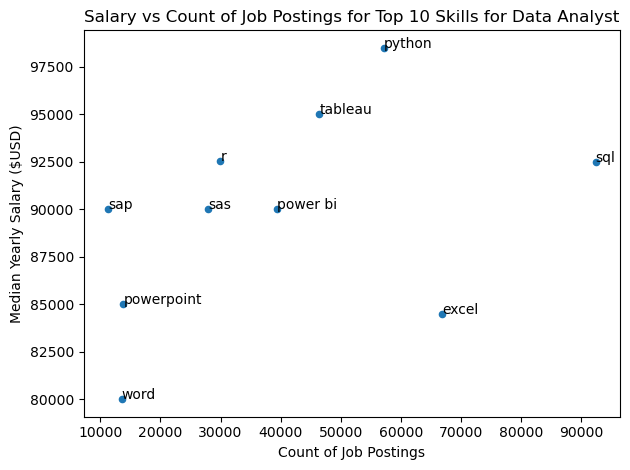

In [79]:
skills_stat.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills for Data Analyst')


for i, txt in enumerate(skills_stat.index):
    plt.text(skills_stat['skill_count'].iloc[i], skills_stat['median_salary'].iloc[i], txt)
plt.tight_layout()    
plt.show()